## Mengimpor library yang dibutuhkan

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import joblib

## Load file CSV 'anime.csv'  dan menampilkan 5 baris pertama. Lalu, atur df ditetapkan agar semua kolom ditampilkan

In [ ]:
df = pd.read_csv('anime.csv')
pd.set_option('display.max_columns', None)

df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


## Menampilkan informasi singkat tentang DataFrame 'df'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

## Mengambil beberapa kolom yang di perlukan dari'df' dan menyimpannya sebagai 'df_anime'

In [ ]:
selected_columns = ['MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Aired', 'Rating', 'Members']
df_anime = df.loc[:, selected_columns]

## Membuat variabel 'genres_dummies' yang merupakan hasil encoding one-hot dari kolom 'Genres' pada DataFrame 'df_anime', lalu menggabungkannya dengan DataFrame 'df_anime'

In [ ]:
genres_dummies = df_anime['Genres'].str.get_dummies(sep=', ')
df_anime_with_genres = pd.concat([df_anime, genres_dummies], axis=1)
df_anime_with_genres

,MAL_ID,Name,Score,Genres,Type,Aired,Rating,Members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",R - 17+ (violence & profanity),1251960,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",R - 17+ (violence & profanity),273145,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",PG-13 - Teens 13 or older,558913,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",PG-13 - Teens 13 or older,94683,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",PG - Children,13224,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",ONA,"Apr 4, 2021 to ?",Unknown,354,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",TV,2021 to ?,Unknown,7010,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",TV,"Jul, 2021 to ?",R - 17+ (violence & profanity),11309,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",TV,Unknown,PG-13 - Teens 13 or older,1386,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Membuat Visualisasi Distribusi Genre Anime

In [ ]:
genre_counts = genres_dummies.sum().sort_values(ascending=False)

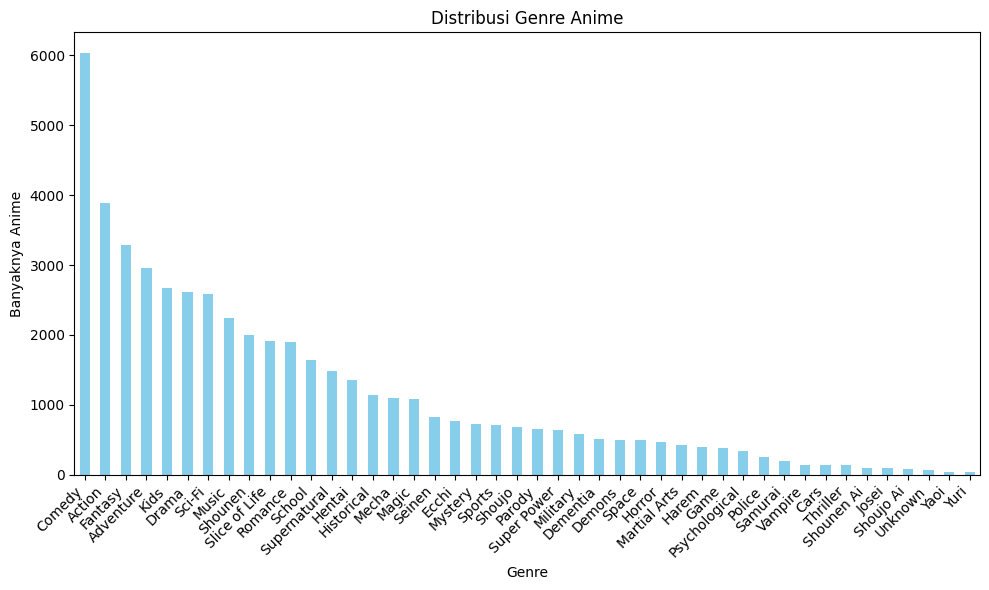

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Genre Anime')
plt.xlabel('Genre')
plt.ylabel('Banyaknya Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Membuat DataFrame baru 'df_filtered' yang berisi data dari 'df_anime_with_genres' dimana tidak ada konten rekomendasi anime dewasa dan menghitung jumlah nilai unik dalam kolom 'Rating'

In [ ]:
df_filtered = df_anime_with_genres[df_anime_with_genres['Rating'] != 'Rx - Hentai']
unique_ratings_count = df_filtered['Rating'].value_counts()
unique_ratings_count

PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: Rating, dtype: int64

Membuat dictionary 'rating_mapping' yang memetakan nilai-nilai string ke nilai numerik untuk kolom 'Rating'

In [ ]:
rating_mapping = {
    'Unknown': 0,
    'G - All Ages': 1,
    'PG - Children': 2,
    'PG-13 - Teens 13 or older': 3,
    'R - 17+ (violence & profanity)': 4,
    'R+ - Mild Nudity': 5
}

df_filtered['Rating'] = df_filtered['Rating'].replace(rating_mapping)

<ipython-input-43-ac625cb06ee1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rating'] = df_filtered['Rating'].replace(rating_mapping)


## Mengambil nilai unik dari kolom 'Type' dalam DataFrame 'df_filtered'

In [ ]:
unique_types = df_filtered['Type'].unique()
print(unique_types)

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Unknown']


## Mengganti nilai string dalam kolom 'Type' dari DataFrame 'df_filtered' dengan nilai numerik sesuai dengan mapping yang telah ditentukan, lalu menampilkan lima baris pertama dari DataFrame baru

In [ ]:
type_mapping = {
    'Unknown': 0,
    'TV': 1,
    'Movie': 2,
    'OVA': 3,
    'Special': 4,
    'ONA': 5,
    'Music': 6
}

df_filtered['Type'] = df_filtered['Type'].replace(type_mapping)
df_filtered.head()

<ipython-input-45-e1b652b77d84>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Type'] = df_filtered['Type'].replace(type_mapping)


,MAL_ID,Name,Score,Genres,Type,Aired,Rating,Members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",1,"Apr 3, 1998 to Apr 24, 1999",4,1251960,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",2,"Sep 1, 2001",4,273145,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",1,"Apr 1, 1998 to Sep 30, 1998",3,558913,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1,"Jul 2, 2002 to Dec 24, 2002",3,94683,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",1,"Sep 30, 2004 to Sep 29, 2005",2,13224,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16217 entries, 0 to 17561
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         16217 non-null  int64 
 1   Name           16217 non-null  object
 2   Score          16217 non-null  object
 3   Genres         16217 non-null  object
 4   Type           16217 non-null  int64 
 5   Aired          16217 non-null  object
 6   Rating         16217 non-null  int64 
 7   Members        16217 non-null  int64 
 8   Action         16217 non-null  int64 
 9   Adventure      16217 non-null  int64 
 10  Cars           16217 non-null  int64 
 11  Comedy         16217 non-null  int64 
 12  Dementia       16217 non-null  int64 
 13  Demons         16217 non-null  int64 
 14  Drama          16217 non-null  int64 
 15  Ecchi          16217 non-null  int64 
 16  Fantasy        16217 non-null  int64 
 17  Game           16217 non-null  int64 
 18  Harem          16217 non-n

## Mengonversi kolom 'Score' ke tipe data numerik dengan mengabaikan nilai yang tidak dapat diubah, dan menghapus baris yang mengandung nilai yang hilang dari DataFrame 'df_filtered'

In [ ]:
df_filtered['Score'] = pd.to_numeric(df_filtered['Score'], errors='coerce')
df_filtered.dropna(inplace=True)

<ipython-input-47-688b55d571cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Score'] = pd.to_numeric(df_filtered['Score'], errors='coerce')
<ipython-input-47-688b55d571cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


## Membuat objek MinMaxScaler() untuk normalisasi, lalu menentukan fitur-fitur yang akan dinormalisasi dalam list 'features_to_normalize'

In [ ]:
scaler = MinMaxScaler()
features_to_normalize = ['Score', 'Type', 'Rating', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
                         'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei',
                         'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
                         'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo',
                         'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
                         'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri']

## Menggunakan objek MinMaxScaler() untuk menormalkan fitur-fitur yang ditentukan dalam list 'features_to_normalize' pada DataFrame 'df_filtered', dan menyimpan hasilnya ke dalam DataFrame baru 'df_normalized'

In [ ]:
df_normalized = df_filtered.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_filtered[features_to_normalize])

## Menghitung "cosine similarity" antar fitur anime yang telah dinormalisasi dan menyimpan hasilnya dalam 'anime_similarity'

In [ ]:
anime_features = df_normalized[features_to_normalize]
anime_similarity = cosine_similarity(anime_features, anime_features)

## Mendefinisikan fungsi 'get_recommendations' untuk mendapatkan rekomendasi lima anime berdasarkan nama anime yang diberikan, menggunakan matriks kemiripan dan data anime

In [ ]:
def get_recommendations(anime_name, similarity_matrix, anime_data):
    anime_index = anime_data[anime_data['Name'] == anime_name].index[0]
    anime_similarities = similarity_matrix[anime_index]
    similar_anime_indices = anime_similarities.argsort()[::-1][1:6]
    similar_anime_names = anime_data.iloc[similar_anime_indices]['Name'].tolist()
    return similar_anime_names

## Variabel 'anime_rec' menyimpan nama anime yang akan digunakan sebagai referensi untuk mendapatkan rekomendasi anime lainnya

In [ ]:
anime_rec = "Naruto"

## Mencetak 5 rekomendasi anime berdasarkan anime yang ditulis pada var "anime_rec" menggunakan matriks kemiripan dan data anime yang telah difilter

In [ ]:
recommended_anime = get_recommendations(anime_rec, anime_similarity, df_filtered)
# Buat DataFrame dari rekomendasi anime
df_recommended_anime = pd.DataFrame(recommended_anime, columns=['Rekomendasi Anime'])

# Cetak DataFrame dalam format tabel
print("Rekomendasi Anime:")
df_recommended_anime

Rekomendasi Anime:


,Rekomendasi Anime
0,Naruto: Shippuuden
1,Boruto: Jump Festa 2016 Special
2,Dragon Ball Z
3,Dragon Ball Kai
4,Dragon Ball Kai (2014)


## Menghitung presisi dari rekomendasi anime berdasarkan anime yang disukai pengguna, menggunakan fungsi 'calculate_precision'

In [ ]:
def calculate_precision(recommended_anime, liked_anime):
    relevant_recommendations = len(set(recommended_anime) & set(liked_anime))
    precision = relevant_recommendations / len(recommended_anime) if len(recommended_anime) > 0 else 0
    return precision

#Anime yang disukai oleh pengguna (contoh)
liked_anime = ['Naruto', 'Bleach', 'One Piece', 'Dragon Ball Z']

precision = calculate_precision(recommended_anime, liked_anime)
print("Precision:", precision)

Precision: 0.2


## Menghitung skor recall dari rekomendasi anime berdasarkan anime yang disukai pengguna, menggunakan fungsi 'calculate_recall'

In [ ]:
def calculate_recall(recommended_anime, liked_anime):
    relevant_recommendations = len(set(recommended_anime) & set(liked_anime))
    recall = relevant_recommendations / len(liked_anime) if len(liked_anime) > 0 else 0
    return recall

liked_anime = ['Naruto', 'Bleach', 'One Piece', 'Dragon Ball Z']

recall_score = calculate_recall(recommended_anime, liked_anime)
print("Recall Score:", recall_score)

Recall Score: 0.25


## Menghitung skor F1 dari rekomendasi anime berdasarkan anime yang disukai pengguna, menggunakan fungsi 'calculate_f1'

In [ ]:
def calculate_f1(recommended_anime, liked_anime):
    relevant_recommendations = len(set(recommended_anime) & set(liked_anime))
    precision = relevant_recommendations / len(recommended_anime) if len(recommended_anime) > 0 else 0
    recall = relevant_recommendations / len(liked_anime) if len(liked_anime) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

liked_anime = ['Naruto', 'Bleach', 'One Piece', 'Dragon Ball Z']

f1_score = calculate_f1(recommended_anime, liked_anime)
print("F1 Score:", f1_score)

F1 Score: 0.22222222222222224


In [ ]:
#Membuat DataFrame yang berisi skor F1, recall, dan presisi beserta nilainya
scores_data = {
    "Metric": ["F1 Score", "Recall Score", "Precision"],
    "Score": [f1_score, recall_score, precision]
}
df_scores = pd.DataFrame(scores_data)
df_scores

,Metric,Score
0,F1 Score,0.222222
1,Recall Score,0.250000
2,Precision,0.200000


## Menyimpan model rekomendasi anime sebagai file

In [ ]:
joblib.dump(anime_similarity, 'anime_recommendation_model_IDCAMP_2023.joblib')

['anime_recommendation_model_IDCAMP_2023.joblib']